Fundamentals of Machine Learning 
# Assignment #1

Prompt:
Make a Notebook with the following elements. Please add sufficient comments: not just explaining what you are doing, but why you are doing it.
#1 Your data pre-processing steps
#2 The head() of the resulting data frame
#3 A plot of a time series of your choice, e.g. mean steps per day over all participants
#4 An analysis of one quantitative variable (e.g. mean steps per participant), including:
            - 2 graphs of the distribution (e.g., histogram, box plot, density plot, violin plot)
            - Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
            - Verbal description of the distribution, including an investigation into its normality, skewness, outliers, etc

In [87]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 

df1 = pd.read_csv('steps.csv', sep = ";" ) #reformat the dataframe with the correct seperators
df1["Total steps"] = df1.drop("id", axis=1).sum(axis=1) #add a column named total steps by summing up each row except the cell named "id"
df1["Total days used"] = df1.drop("id", axis=1).count(axis=1) #add a column named total days used by counting all days except the cell named "id"
df1["Mean steps per day/user"] = df1.drop(["id", "Total steps","Total days used"],axis=1).mean(axis=1).round(0) #calculating mean steps poer day per user
df1.head() #output of the rows

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Total steps,Total days used,Mean steps per day/user
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1683911.0,166,10206.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,927050.0,164,5687.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,1228656.0,149,8302.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72664.0,21,3633.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286855.0,55,5312.0


In [76]:
df2 = pd.read_csv('survey.csv')
df2.head() #output of the rows

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [94]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier - merge two files
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,Total days used,Mean steps per day/user,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,166,10206.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,164,5687.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,149,8302.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,3633.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55,5312.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [95]:
df.info() #Show overall information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 340 entries, id to weight
dtypes: float64(332), int64(4), object(4)
memory usage: 2.4+ MB


### (In-class exercise) Filter out unrealistic data:

In [96]:
# filter out unrealistic data based on the observation of the original csv file
def impossible_data(x):
    if(x > 200.0) or (x < 40.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(impossible_data)

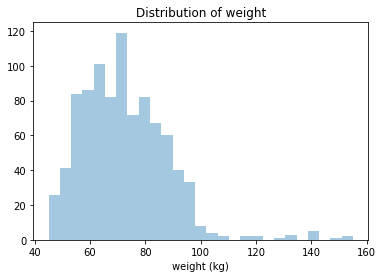

In [104]:
sns.distplot(df['weight'].dropna(), kde=False)
plt.title('Distribution of weight')
plt.xlabel('weight (kg)')
plt.show()

The distribution of weight is skewing toward the left.

### Ploting for a Period

In [127]:
def impossible_steps(x):
    if(x > 75000.0) or (x < 0.0): 
        return float('NaN')
    else: 
        return x
df['Mean steps per day/user'] = df['Mean steps per day/user'].apply(impossible_steps)

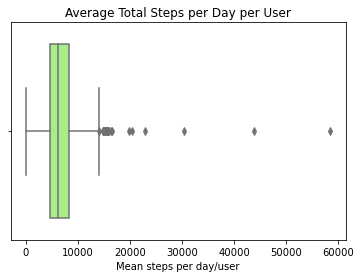

In [128]:
sns.boxplot(x = df["Mean steps per day/user"], color="#a0ff7a")
plt.title("Average Total Steps per Day per User")
plt.show()

In [129]:
mean_steps = df.loc[:,"30-6-2013":"30-7-2013"].mean() #calculate the average steps over this period
mean_steps.index #the indexes now contain the dates

Index(['30-6-2013', '1-7-2013', '2-7-2013', '3-7-2013', '4-7-2013', '5-7-2013',
       '6-7-2013', '7-7-2013', '8-7-2013', '9-7-2013', '10-7-2013',
       '11-7-2013', '12-7-2013', '13-7-2013', '14-7-2013', '15-7-2013',
       '16-7-2013', '17-7-2013', '18-7-2013', '19-7-2013', '20-7-2013',
       '21-7-2013', '22-7-2013', '23-7-2013', '24-7-2013', '25-7-2013',
       '26-7-2013', '27-7-2013', '28-7-2013', '29-7-2013', '30-7-2013'],
      dtype='object')

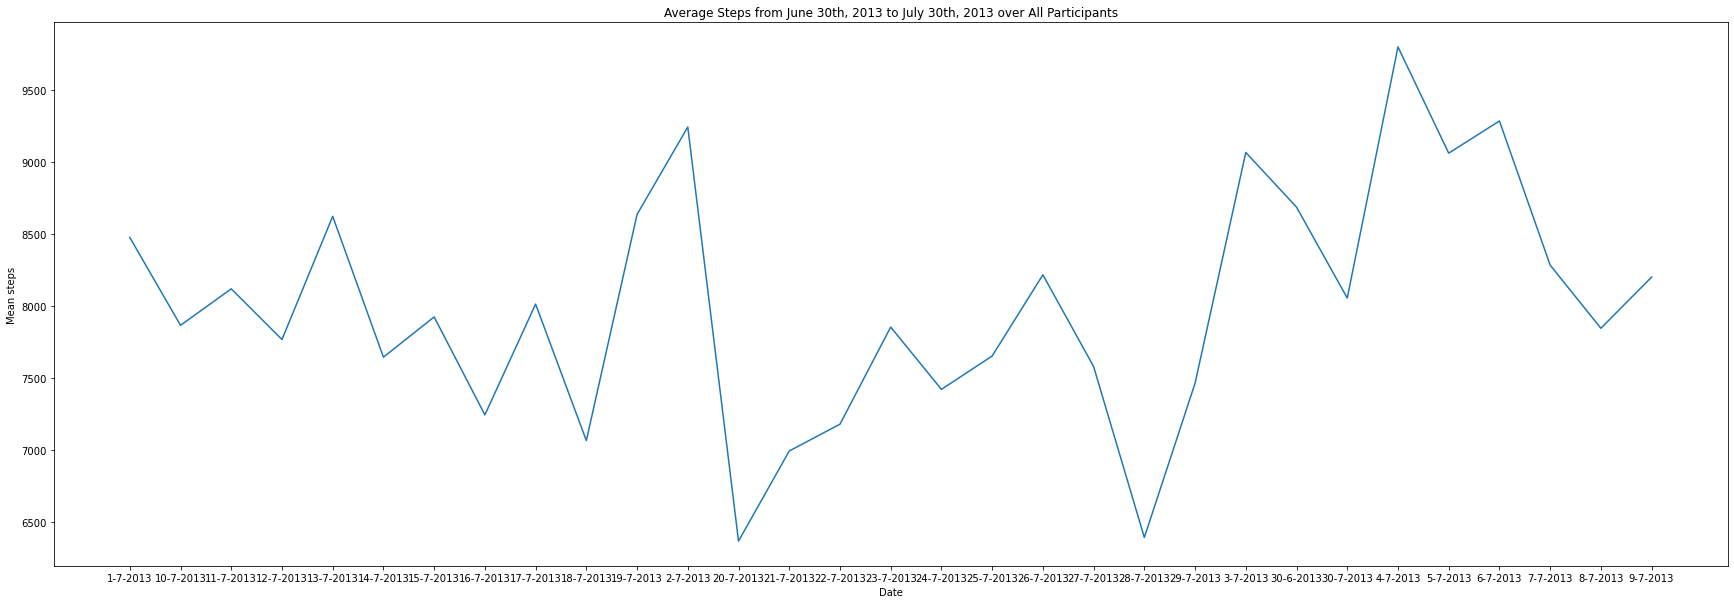

In [130]:
plt.figure(figsize=(30, 10)) #set the figure ("canvas") size
plot = sns.lineplot(x=mean_steps.index, y=mean_steps) #create the plot

plt.title("Average Steps from June 30th, 2013 to July 30th, 2013 over All Participants")
plt.xlabel("Date")
plt.ylabel("Mean steps")
plt.show() 

#The date part are labelled incorrect I believe. For some reasons the dates start going backward (aka notice how it ended on 9-7-2013)...